In [1]:
# Importing the necessary dependency libraries
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import shap
import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
# Define model performance test functions
def mlperformance(rf, xtrain_up, ytrain_up, x_train, y_train):
    # fit modle
    rf.fit(xtrain_up, ytrain_up);
    # AUC
    auc_scores = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    print('auc = ', "%.3f"%auc_scores)
    # accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_train, rf.predict(x_train))*100
    print('accuracy = ', "%.1f"%accuracy)
    print('------------------------')
    # Confusion matrix
    import sklearn.metrics as sm
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(y_train, rf.predict(x_train), labels=None, sample_weight=None)
    print('混淆矩阵为：')
    print(matrix)
    (tn,fp,fn,tp) = matrix.ravel()
    print('tn=',tn)
    print('fp=',fp)
    print('fn=',fn)
    print('tp=',tp)
    print('------------------------')
    sensitivity = (tp/(tp+fn))*100
    specificity = (tn/(fp+tn))*100
    PPV=tp/(tp+fp)*100
    NPV=tn/(fn+tn)*100
    print(f'PPV = {"%.1f"%PPV}\n({tp}/{(tp+fp)})')
    print(f'NPV = {"%.1f"%NPV}\n({tn}/{(fn+tn)})')
    print(f'sensitivity = {"%.1f"%sensitivity}\n({tp}/{(tp+fn)})')
    print(f'specificity = {"%.1f"%specificity}\n({tn}/{(fp+tn)})')

In [3]:
# Reading data
train = pd.read_csv('F:/Onedrive/JIMMY/Python/Notebook/data_set/inuse/train.csv',encoding='gbk')
test = pd.read_csv('F:/Onedrive/JIMMY/Python/Notebook/data_set/inuse/test.csv',encoding='gbk')
validation = pd.read_csv('F:/Onedrive/JIMMY/Python/Notebook/data_set/inuse/validation_new04.csv',encoding='gbk')

xtrain = train.iloc[:,1:14]
xtest = test.iloc[:,1:14]
xv = validation.iloc[:,1:14]
ytrain = train.iloc[:,-1]
ytest = test.iloc[:,-1]
yv = validation.iloc[:,-1]

# Up-sampling processing
sm = SMOTE(sampling_strategy={1: 2600},random_state=100) 
xtrainup,ytrainup = sm.fit_resample(xtrain,ytrain)

After over-sampling, the number of samples (2600) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1582)


In [4]:
# Model Instantiation
rf = RandomForestClassifier(n_estimators=258,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features=1,
                             random_state=266,
                             n_jobs=-1) 

In [5]:
# Testing the model on the training set
mlperformance(rf, xtrainup, ytrainup, xtrain, ytrain)

auc =  0.983
accuracy =  89.8
------------------------
混淆矩阵为：
[[1385  197]
 [  24  562]]
tn= 1385
fp= 197
fn= 24
tp= 562
------------------------
PPV = 74.0
(562/759)
NPV = 98.3
(1385/1409)
sensitivity = 95.9
(562/586)
specificity = 87.5
(1385/1582)


In [6]:
# Calculate SHAP values to understand the detailed diagnostic basis of the model
shap.initjs()
explainer=shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtrain)
expected_value= explainer.expected_value

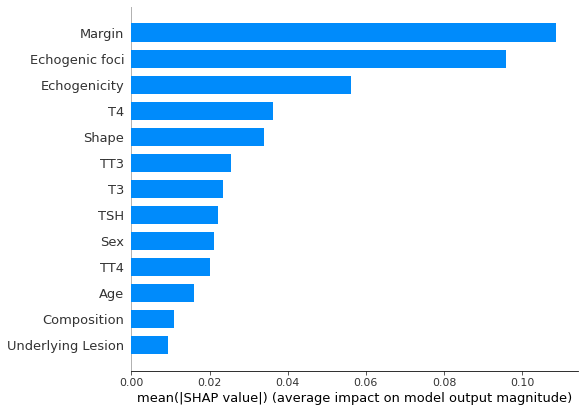

In [7]:
shap.summary_plot(shap_values[1], xtrain, plot_type="bar")

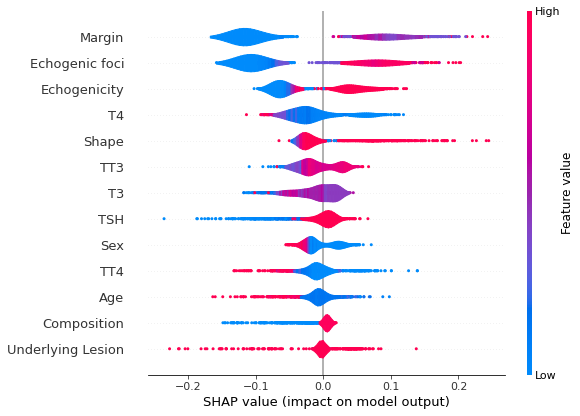

In [8]:
shap.summary_plot(shap_values[1], xtrain, plot_type="violin")

In [9]:
shap.force_plot(expected_value[1], shap_values[1],xtrain)

In [10]:
# Testing the model on the internal validation set
mlperformance(rf, xtrainup, ytrainup, xtest, ytest)

auc =  0.909
accuracy =  82.3
------------------------
混淆矩阵为：
[[526 140]
 [ 25 239]]
tn= 526
fp= 140
fn= 25
tp= 239
------------------------
PPV = 63.1
(239/379)
NPV = 95.5
(526/551)
sensitivity = 90.5
(239/264)
specificity = 79.0
(526/666)


In [11]:
# Calculate SHAP values to understand the detailed diagnostic basis of the model
shap.initjs()
explainer=shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtest)
expected_value= explainer.expected_value

In [12]:
shap.force_plot(expected_value[1], shap_values[1], xtest)

In [13]:
# Testing the model on the external validation set
mlperformance(rf, xtrainup, ytrainup, xv, yv)

auc =  0.880
accuracy =  76.8
------------------------
混淆矩阵为：
[[475 157]
 [ 44 191]]
tn= 475
fp= 157
fn= 44
tp= 191
------------------------
PPV = 54.9
(191/348)
NPV = 91.5
(475/519)
sensitivity = 81.3
(191/235)
specificity = 75.2
(475/632)


In [14]:
# Calculate SHAP values to understand the detailed diagnostic basis of the model
shap.initjs()
explainer=shap.Explainer(rf)
shap_values = explainer.shap_values(xv)
expected_value= explainer.expected_value

In [15]:
shap.force_plot(expected_value[1], shap_values[1],xv)